<a href="https://colab.research.google.com/github/NicoloAvesani/Mining_Project/blob/main/that's_good_OK_APRIORI%2C_FP_GROWTH_and_ECLAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset generator
https://github.com/jeffheaton/papers/blob/master/2016/ieee-freq-item/GenerateFreqData.py


In [44]:
# This Python script was used to collect the data for following paper/conference:
#
# Heaton, J. (2016, April). Comparing Dataset Characteristics that Favor the Apriori, 
# Eclat or FP-Growth Frequent Itemset Mining Algorithms. In SoutheastCon 2015 (pp. 1-6). IEEE.
#
# http://www.jeffheaton.com
#

# Generate benchmark data for frequent itemset mining.
__author__ = 'jheaton'
import random
import csv
from tqdm import tqdm

def sizeof_fmt(num):
    for x in ['','k','m','g']:
        if num < 1000.0:
            return "%3.1f%s" % (num, x)
        num /= 1000.0
    return "%3.1f%s" % (num, 't')

def generate_itemset(row_count, max_per_basket, num_freq_sets, item_count, prob_frequent):
    '''
    Generate a dataset of frequent items. These paramaters can be changed to 
    determine the type of data to generate.

    :param int row_count: The number of rows in the dataset.
    :param int max_per_basket: Maximum number of items per basket.
    :param int num_freq_sets: The number of unique frequent item sets.
    :param int item_count: The number of unique items.
    :param float prob_frequent: The probability of a basket containing a frequent itemset.
    '''
    # Generate the data
    pop_frequent = ["F"+str(n) for n in range(0,max_per_basket)]
    pop_regular = ["I"+str(n) for n in range(max_per_basket,item_count)]
    freq_itemsets = []

    # Create a filename that encodes the max_per_basket and basket_count into
    # the filename.
    filename = str(prob_frequent)+"_tsz" \
        + str(max_per_basket)+'_tct' \
         +sizeof_fmt(row_count)+'.txt'

    for i in tqdm(range(num_freq_sets),desc=f"{filename}:pass 1/2"):
        cnt = random.randint(1,max_per_basket)
        freq_itemsets.append(random.sample(pop_frequent,cnt))

    with open(filename, 'w') as f:
        for i in tqdm(range(row_count),desc=f"{filename}:pass 2/2"):
            line = []

            cnt = random.randint(1,max_per_basket)
            if random.random()<=prob_frequent:
                idx = random.randint(0,len(freq_itemsets)-1)
                for j in range(len(freq_itemsets[idx])):
                    line.append(freq_itemsets[idx][j])

            needed = max(0,cnt - len(line))
            line = line + random.sample(pop_regular,needed)

            f.write(" ".join(line)+"\n")

random.seed(1000)
ROWS = 100000

for i in range(10,100,10):
    generate_itemset(ROWS, i, 100, 5000, 0.5)

for i in range(1,9,1):
    generate_itemset(ROWS, 50, 100, 5000, i/10.0)

0.8_tsz50_tct100.0k.txt:pass 2/2: 100%|██████████| 100000/100000 [00:01<00:00, 57472.88it/s]


In [ ]:
    #Generate a dataset of frequent items. These paramaters can be changed to 
    #determine the type of data to generate.

    #:param int row_count: The number of rows in the dataset. (in this case they are 10000)
    #:param int max_per_basket: Maximum number of items per basket. (max 100 items per basket)
    #:param int num_freq_sets: The number of unique frequent item sets. (100 freq item sets)
    #:param int item_count: The number of unique items. (500 unique items)
    #:param float prob_frequent: The probability of a basket containing a frequent itemset. (50% is the probability that a basket contains a freq itemset)

In [3]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('0.5_tsz10_tct1.0m.txt')

In [4]:
# I want the dataset to be a np.array
dataset_array = np.array(dataset)

print(dataset_array[0])

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
new_array = []
for i in range(len(dataset_array)):
    split_elements = np.char.split(dataset_array[i].astype(str))
    ok_split_elements = (split_elements[0])
    new_array.append(ok_split_elements)

['F1 F6 F4 F0 F8 F3 F7 F2 F5']


In [ ]:
# now it works
#new_array[1]

In [ ]:
#new_array[0]

In [ ]:
#len(new_array[0])

In [48]:
size_dataset = [
    '0.5_tsz10_tct100.0K.txt',
    '0.5_tsz20_tct100.0K.txt',
    '0.5_tsz30_tct100.0K.txt',
    '0.5_tsz40_tct100.0K.txt',
    '0.5_tsz50_tct100.0K.txt',
    '0.5_tsz60_tct100.0K.txt',
    '0.5_tsz70_tct100.0K.txt',
    '0.5_tsz80_tct100.0K.txt',
    '0.5_tsz90_tct100.0K.txt',
]

#apriori



In [8]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from apyori import apriori
import time

In [49]:
runtime_apriori = []

for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)



# Example dataset
  dataset = new_array

# Minimum support threshold
  min_support = 0.2
 
  start = time.time()
# Apply the Apriori algorithm
  results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
  for itemset in results:
      items = list(itemset.items)
      support = itemset.support
    

  end = time.time()

  result_time = end - start

  runtime_apriori.append(result_time)
  

FileNotFoundError: ignored

In [14]:
import matplotlib.pyplot as plt

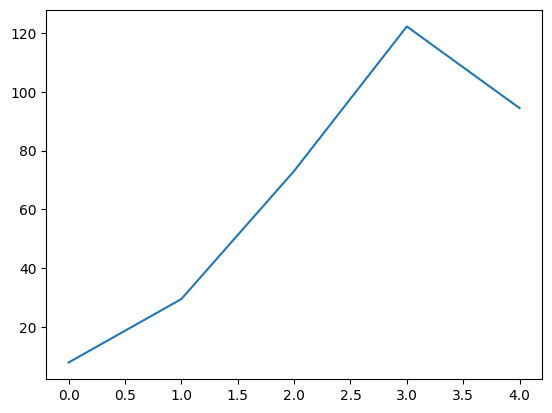

In [16]:
plt.plot(runtime_apriori)

APRIORI LIBRARY DOCUMENTATION

In [5]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=57b3528aa363fe01a61f425c1ca87c61ce9a11dcd22bb6fddde574691ce0ad2d
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori
import time

# Example dataset
dataset = new_array

# Minimum support threshold
min_support = 0.2

start = time.time()
# Apply the Apriori algorithm
results = list(apriori(dataset, min_support=min_support))

# Print frequent itemsets and their support
for itemset in results:
    items = list(itemset.items)
    support = itemset.support
    print(items, support)

end = time.time()

print('Time required:', end - start)


['F0'] 0.24487244872448724
['F1'] 0.26574265742657427
['F10'] 0.2900329003290033
['F11'] 0.22002220022200222
['F12'] 0.2576125761257613
['F13'] 0.23972239722397223
['F14'] 0.24858248582485826
['F15'] 0.25278252782527827
['F16'] 0.24007240072400723
['F17'] 0.2799827998279983
['F18'] 0.23392233922339223
['F19'] 0.22470224702247021
['F2'] 0.24652246522465224
['F20'] 0.26173261732617326
['F21'] 0.23046230462304623
['F22'] 0.26055260552605525
['F23'] 0.23612236122361224
['F24'] 0.26614266142661425
['F25'] 0.23575235752357523
['F26'] 0.25960259602596025
['F27'] 0.23657236572365722
['F28'] 0.26891268912689126
['F29'] 0.2840228402284023
['F3'] 0.2989729897298973
['F30'] 0.25645256452564524
['F31'] 0.2642226422264223
['F32'] 0.23075230752307524
['F33'] 0.21568215682156822
['F34'] 0.2661326613266133
['F35'] 0.2706427064270643
['F36'] 0.2701027010270103
['F37'] 0.24413244132441325
['F38'] 0.24514245142451424
['F39'] 0.24927249272492724
['F4'] 0.25505255052550524
['F40'] 0.2703827038270383
['F41']

#fp-growth
https://github.com/JackHCC/Apriori-and-FP_Growth/blob/master/FP_growth.py


In [18]:
#fp-growth

# fp-growth

from collections import defaultdict, namedtuple
import time

def find_frequent_itemsets(transactions, minimum_support, include_support=False):
    # Function to find frequent itemsets in the transactions dataset

    items = defaultdict(lambda: 0)

    for transaction in transactions:
        for item in transaction:
            items[item] += 1

    # Filtering frequent 1-itemsets
    items = dict((item, support) for item, support in items.items()
        if support >= minimum_support)

    def clean_transaction(transaction):
        transaction = filter(lambda v: v in items, transaction)
        transaction_list = list(transaction)
        transaction_list.sort(key=lambda v: items[v], reverse=True)
        return transaction_list

    # Constructing the FP-tree
    master = FPTree()
    for transaction in map(clean_transaction, transactions):
        master.add(transaction)

    def find_with_suffix(tree, suffix):
        for item, nodes in tree.items():
            support = sum(n.count for n in nodes)
            if support >= minimum_support and item not in suffix:
                found_set = [item] + suffix
                yield (found_set, support) if include_support else found_set

                cond_tree = conditional_tree_from_paths(tree.prefix_paths(item))
                for s in find_with_suffix(cond_tree, found_set):
                    yield s

    for itemset in find_with_suffix(master, []):
        yield itemset

class FPTree(object):
    # FP-tree data structure

    Route = namedtuple('Route', 'head tail')

    def __init__(self):
        # Initialize the root node and routes
        self._root = FPNode(self, None, None)
        self._routes = {}

    @property
    def root(self):
        # Create the root node
        return self._root

    def add(self, transaction):
        # Add a transaction to the tree
        point = self._root

        for item in transaction:
            next_point = point.search(item)
            if next_point:
                # Current node already exists
                next_point.increment()
            else:
                # Create a new node
                next_point = FPNode(self, item)
                point.add(next_point)

                # Update the routes
                self._update_route(next_point)

            point = next_point

    def _update_route(self, point):
        assert self is point.tree

        try:
            route = self._routes[point.item]
            route[1].neighbor = point  # route[1] is the tail
            self._routes[point.item] = self.Route(route[0], point)
        except KeyError:
            # Start a new node
            self._routes[point.item] = self.Route(point, point)

    def items(self):
        # Iterate over the items in the tree
        for item in self._routes.keys():
            yield (item, self.nodes(item))

    def nodes(self, item):
        # Iterate over the nodes associated with an item
        try:
            node = self._routes[item][0]
        except KeyError:
            return

        while node:
            yield node
            node = node.neighbor

    def prefix_paths(self, item):
        # Generate prefix paths for an item
        def collect_path(node):
            path = []
            while node and not node.root:
                path.append(node)
                node = node.parent
            path.reverse()
            return path

        return (collect_path(node) for node in self.nodes(item))

    def inspect(self):
        # Print the tree structure
        self.root.inspect(1)

        for item, nodes in self.items():
            for node in nodes:
                print('    %r' % node)

def conditional_tree_from_paths(paths):
    # Construct a conditional tree from paths
    tree = FPTree()
    condition_item = None
    items = set()

    for path in paths:
        if condition_item is None:
            condition_item = path[-1].item

        point = tree.root
        for node in path:
            next_point = point.search(node.item)
            if not next_point:
                # Add a new node to the tree
                items.add(node.item)
                count = node.count if node.item == condition_item else 0
                next_point = FPNode(tree, node.item, count)
                point.add(next_point)
                tree._update_route(next_point)
            point = next_point

    assert condition_item is not None

    # Calculate the counts for nodes
    for path in tree.prefix_paths(condition_item):
        count = path[-1].count
        for node in reversed(path[:-1]):
            node._count += count

    return tree

class FPNode(object):
    # FP-tree node

    def __init__(self, tree, item, count=1):
        self._tree = tree
        self._item = item
        self._count = count
        self._parent = None
        self._children = {}
        self._neighbor = None

    def add(self, child):
        # Add a child node

        if not isinstance(child, FPNode):
            raise TypeError("Can only add other FPNodes as children")

        if not child.item in self._children:
            self._children[child.item] = child
            child.parent = self

    def search(self, item):
        # Search for a child node with the given item
        try:
            return self._children[item]
        except KeyError:
            return None

    def __contains__(self, item):
        return item in self._children

    @property
    def tree(self):
        return self._tree

    @property
    def item(self):
        return self._item

    @property
    def count(self):
        return self._count

    def increment(self):
        if self._count is None:
            raise ValueError("Root nodes have no associated count.")
        self._count += 1

    @property
    def root(self):
        return self._item is None and self._count is None

    @property
    def leaf(self):
        return len(self._children) == 0

    @property
    def parent(self):
        return self._parent

    @parent.setter
    def parent(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a parent.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a parent from another tree.")
        self._parent = value

    @property
    def neighbor(self):
        return self._neighbor

    @neighbor.setter
    def neighbor(self, value):
        if value is not None and not isinstance(value, FPNode):
            raise TypeError("A node must have an FPNode as a neighbor.")
        if value and value.tree is not self.tree:
            raise ValueError("Cannot have a neighbor from another tree.")
        self._neighbor = value

    @property
    def children(self):
        return tuple(self._children.values())

    def inspect(self, depth=0):
        for child in self.children:
            child.inspect(depth + 1)

    def __repr__(self):
        if self.root:
            return "<%s (root)>" % type(self).__name__
        return "<%s %r (%r)>" % (type(self).__name__, self.item, self.count)


In [ ]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    start = time.time()

    total_baskets = len(dataset)
    min_support = 0.2 * total_baskets

    frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

    result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))

    result = sorted(result, key=lambda i: i[0])
    for itemset, support in result:
        print(str(itemset) + ' ' + str(support/total_baskets))

    end = time.time()
    print('Execution time:', str(end - start))


In [ ]:

runtime_fpgrowth = []

for i in range(len(size_dataset)):
  dataset = pd.read_csv(size_dataset[i])

# I want the dataset to be a np.array
  dataset_array = np.array(dataset)

  

# since the array contains baskets with only a string of element and not a list of elements, I need to fix this thing
  new_array = []
  for i in range(len(dataset_array)):
      split_elements = np.char.split(dataset_array[i].astype(str))
      ok_split_elements = (split_elements[0])
      new_array.append(ok_split_elements)
  # Dataset
  dataset = new_array
# Main function
  if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
      start = time.time()

      total_baskets = len(dataset)
      min_support = 0.2 * total_baskets

      frequent_itemsets = find_frequent_itemsets(dataset, minimum_support=min_support, include_support=True)

      result = []
      for itemset, support in frequent_itemsets:
          result.append((itemset, support))

      result = sorted(result, key=lambda i: i[0])
      for itemset, support in result:
          print(str(itemset) + ' ' + str(support/total_baskets))

      end = time.time()
      
      result_time = end - start
      runtime_apriori.append(result_time)
 
  

In [34]:
runtime_fpgrowth = runtime_apriori[5:10]

runtime_fpgrowth

[5.144964694976807,
 14.06768012046814,
 23.318829774856567,
 38.84736394882202,
 43.21184825897217]

In [37]:
runtime_apriori[:5]

[7.933926582336426,
 29.517929077148438,
 73.07316136360168,
 122.24559760093689,
 94.46868848800659]

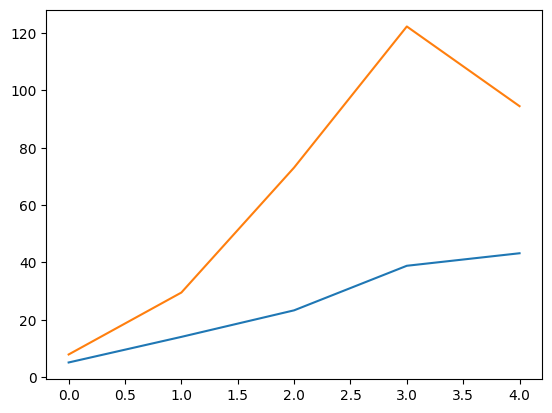

In [41]:
plt.plot(runtime_fpgrowth)
plt.plot(runtime_apriori[:5])

In [ ]:
#!pip install anytree

In [ ]:
from anytree import Node, RenderTree

# Define the itemsets and their support values
itemsets = result

# Create the root node
root = Node("Root")

# Create the tree nodes and add them to the tree
for itemset, support in itemsets:
    current_node = root
    for item in itemset:
        child_node = None
        for child in current_node.children:
            if child.name == item:
                child_node = child
                break
        if child_node is None:
            child_node = Node(item, parent=current_node)
        current_node = child_node

# Print the tree
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))


# eclat
https://github.com/jagdeep227/Frequent_itemset_mining/blob/main/Eclat_g.py


In [42]:
# eclat
#eclat
import time

FreqItems = dict()
support = dict()


def eclat(prefix, items, dict_id ,minsup,cnt):
    
    while items:
        i ,itids = items.pop()
        isupp = len(itids)
        if isupp >= minsup*cnt:
            print(prefix + [i], isupp/len(dataset))
            FreqItems[frozenset(prefix + [i])] = isupp
            suffix = []
            for j, ojtids in items:
                jtids = itids & ojtids
                if len(jtids ) >= minsup*cnt:
                    suffix.append((j, jtids))
            dict_id += 1
            eclat(prefix +[i], sorted(suffix, key=lambda item: len(item[1]), reverse=True), dict_id ,minsup,cnt)

In [43]:
# Dataset
dataset = new_array
# Main function
if __name__ == '__main__':
    # Call find_frequent_itemsets() to generate frequent itemsets
    
    start = time.time()
    items = {}

    for transaction_id, transaction in enumerate(dataset):
        for item in transaction:
            if item in items:
                items[item].add(transaction_id)
            else:
                items[item] = {transaction_id}
    
    # Convert the dictionary items into a list of tuples
    items = [(item, itids) for item, itids in items.items()]
    
    
    cnt = len(dataset)
    minsup = 0.2
    # Function call to start ECLAT algorithm
    eclat([], sorted(items, key=lambda item: len(item[1]), reverse=True), 1, minsup, cnt)

    '''result = []
    for itemset, support in frequent_itemsets:
        result.append((itemset, support))'''

    '''result'''

    end = time.time()
    print('Execution time:', str(end - start))

['F50'] 0.20411620411620413
['F86'] 0.2042032042032042
['F62'] 0.20442220442220443
['F20'] 0.20456420456420457
['F35'] 0.20496420496420498
['F24'] 0.20929020929020928
['F64'] 0.2096982096982097
['F87'] 0.20972220972220973
['F44'] 0.2098072098072098
['F69'] 0.20995720995720996
['F27'] 0.21414121414121415
['F40'] 0.21417721417721416
['F15'] 0.21426021426021427
['F18'] 0.2143082143082143
['F88'] 0.21445521445521445
['F28'] 0.21447321447321446
['F11'] 0.21458621458621457
['F89'] 0.21458721458721458
['F74'] 0.21477021477021477
['F67'] 0.21912121912121912
['F76'] 0.21912921912921912
['F85'] 0.21948521948521948
['F4'] 0.2194982194982195
['F49'] 0.2197942197942198
['F23'] 0.21986221986221985
['F37'] 0.22392122392122393
['F71'] 0.22414022414022414
['F65'] 0.22442122442122442
['F48'] 0.22442522442522442
['F29'] 0.22444722444722445
['F57'] 0.22456122456122457
['F81'] 0.2246172246172246
['F54'] 0.22475122475122475
['F73'] 0.22478422478422477
['F84'] 0.229012229012229
['F22'] 0.22927422927422927
['